<a href="https://colab.research.google.com/github/jaydengonzal2021/Statistics/blob/main/Jayden_G_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [71]:
%%capture 
!pip install wandb #this whole block imports software so that you can use their commands
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [72]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda')) #this line will create a tensor with the data provided, and specifies that the tensor should track gradients so it will update during training. It also tells it to use the GPU which is faster

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x): #This block tells the system how to plot the data
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):  #this block and the next will pull from a google slides presentation and turn the contents into a set of images
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device) #these lines load the images that were just downloaded and makes them suitable for the AI to use for training

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [73]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()} #this blovk creates a set of labels that can be used for the images and then activates the AI that will put the label on the images

model = alexnet(weights='DEFAULT').to(device)
model.eval();

In [74]:
url = "https://docs.google.com/presentation/d/12PcTd7aRx7H0ufgA6isfdM7k7q3EXWQhY6v3i-MXtLY/edit#slide=id.p" #this is just the link to the google slides

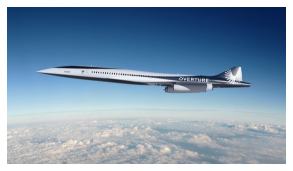

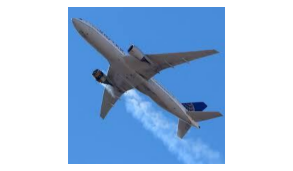

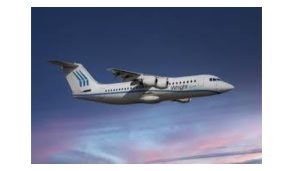

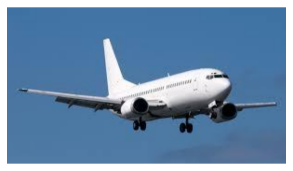

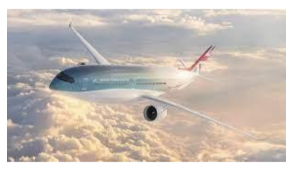

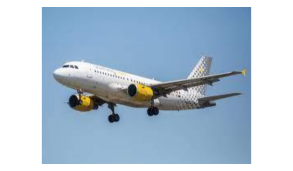

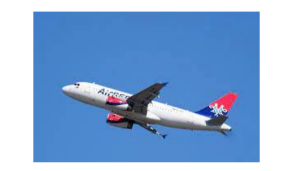

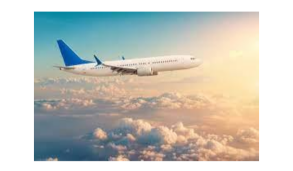

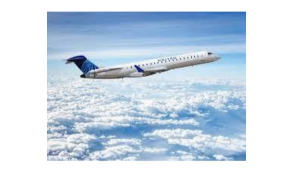

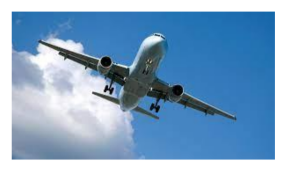

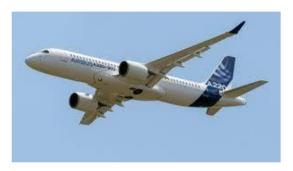

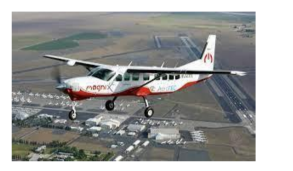

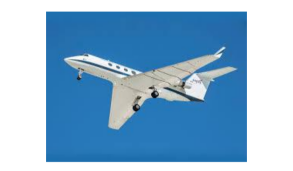

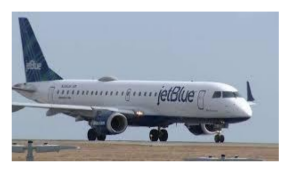

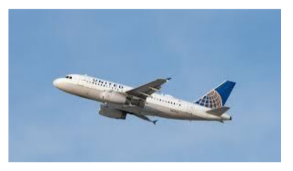

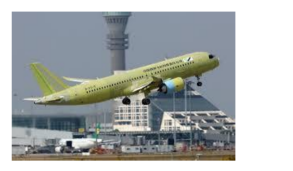

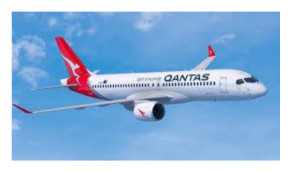

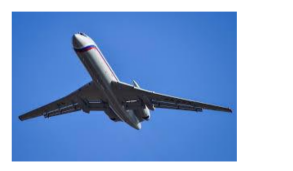

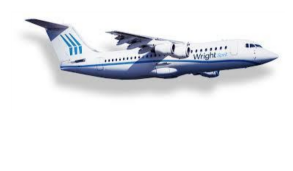

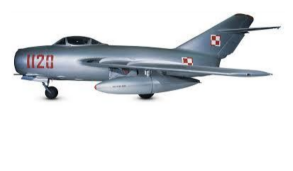

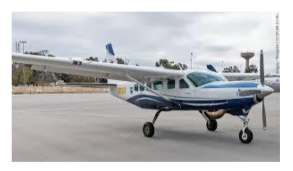

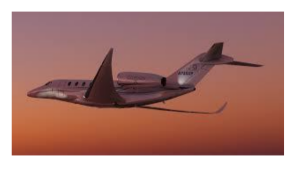

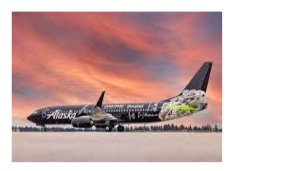

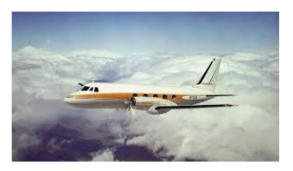

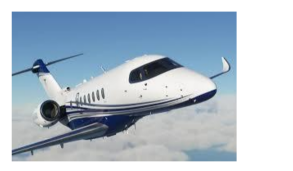

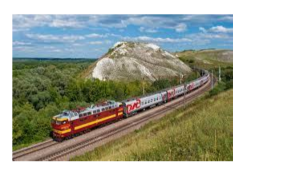

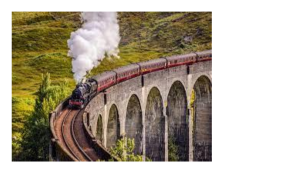

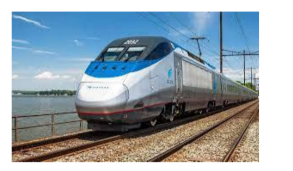

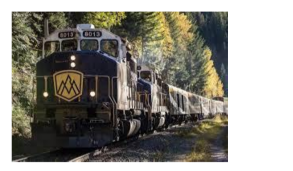

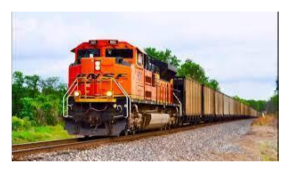

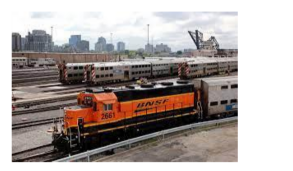

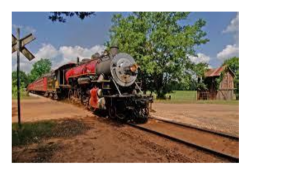

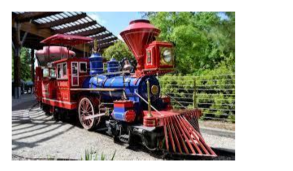

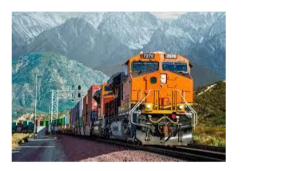

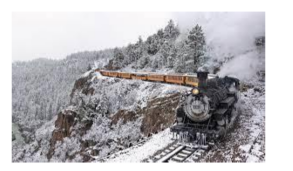

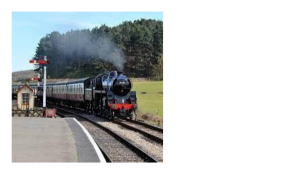

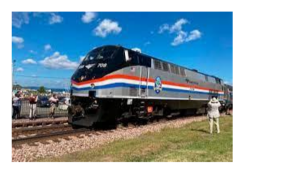

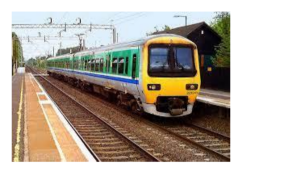

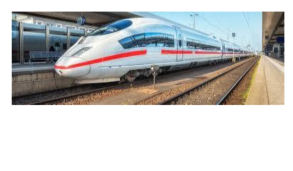

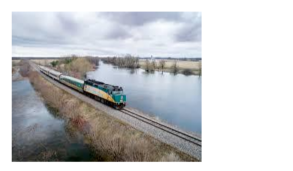

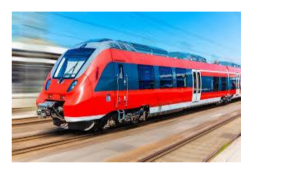

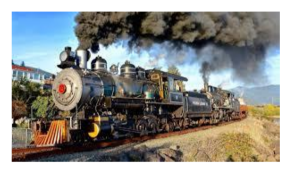

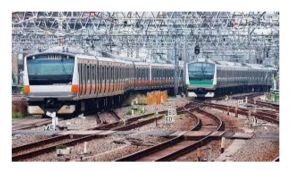

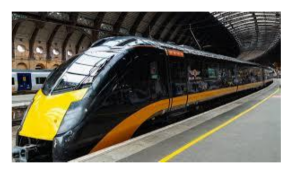

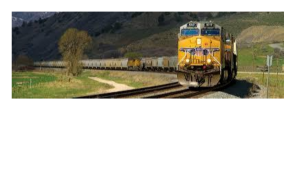

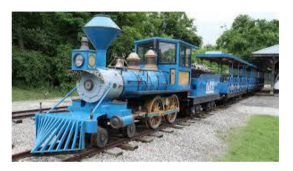

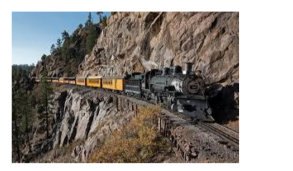

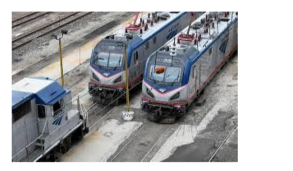

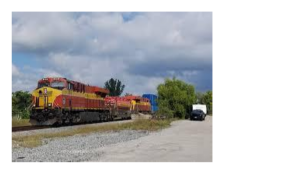

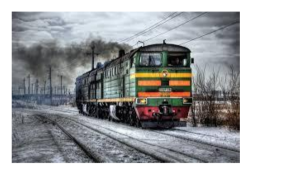

In [75]:
images = []

for image in get_slides(url): #this block will display the images from google slides and puts them into a tensor that can be used by the AI for learning

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [79]:
images.shape #this tells you how many images there are and their size

torch.Size([50, 3, 224, 224])

In [80]:
model(images)

tensor([[-4.3141, -6.8776, -0.1202,  ..., -7.7116, -0.8594,  1.1472],
        [ 1.9209, -1.5920,  5.5732,  ..., -1.8095,  1.4780, -1.7959],
        [-2.4688, -5.5106,  3.9757,  ..., -5.2731, -0.1865,  0.7751],
        ...,
        [ 2.0762, -3.1478,  2.8365,  ..., -4.9974, -1.4933,  2.1294],
        [ 0.3632, -3.7722, -2.6742,  ..., -4.5485,  1.2278, -2.1765],
        [ 1.0225, -2.4913, -0.9774,  ..., -4.5288,  4.8986, -4.0455]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [81]:
y = model(images)

In [82]:
y.shape

torch.Size([50, 1000])

In [83]:
guesses = torch.argmax(y, 1).cpu().numpy() #this line connects the images to the guesses of what they are by the AI

In [84]:
for i in list(guesses): #this line prints those guesses
    print(labels[i])

airliner
airliner
airliner
airliner
beaver
airliner
airliner
airliner
airliner
airliner
airliner
airliner
airliner
airliner
airliner
airliner
airliner
airliner
airliner
power drill
airliner
warplane, military plane
airliner
airliner
airliner
valley, vale
viaduct
passenger car, coach, carriage
freight car
passenger car, coach, carriage
lifeboat
thresher, thrasher, threshing machine
thresher, thrasher, threshing machine
snowplow, snowplough
snowplow, snowplough
steam locomotive
trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi
passenger car, coach, carriage
bullet train, bullet
trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi
passenger car, coach, carriage
steam locomotive
freight car
cab, hack, taxi, taxicab
school bus
thresher, thrasher, threshing machine
cliff, drop, drop-off
passenger car, coach, carriage
seashore, coast, seacoast, sea-coast
passenger car, coach, carriage


In [85]:
Y = np.zeros(50,)
Y[25:] = 1 #this line sets a distinction between the first 25 images and the last 25 images, calling the first 25 "0" and the last 25 "1"

In [86]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [87]:
X = y.detach().cpu().numpy() 

In [88]:
X.shape

(50, 1000)

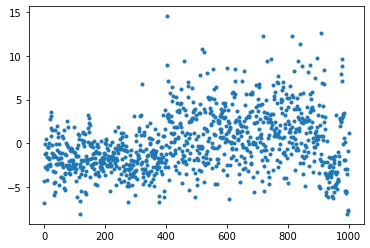

In [89]:
plt.plot(X[0],'.') #this line plots the newly gotten data on a graph

In [90]:
X[0]

array([-4.31409359e+00, -6.87757540e+00, -1.20206356e-01, -1.25003767e+00,
       -2.76251698e+00,  5.35208821e-01, -1.16185284e+00, -2.72794676e+00,
       -4.21710205e+00, -1.61854374e+00, -2.98656940e+00, -2.47376299e+00,
       -4.46448863e-01, -4.09445256e-01, -4.42909360e-01, -1.80699730e+00,
       -3.60865593e-02, -1.69982767e+00,  2.72849655e+00, -2.60867023e+00,
       -2.34316993e+00,  8.13498676e-01,  3.58672476e+00,  3.13241363e+00,
        1.73534632e+00, -1.11140478e+00,  1.53984094e+00, -1.95762724e-01,
       -1.56975675e+00, -1.25467205e+00, -3.20797849e+00, -5.93123198e+00,
       -4.60092402e+00, -1.32292295e+00,  1.45395780e+00, -5.54649734e+00,
       -3.27468657e+00, -4.48969364e+00, -1.57223392e+00, -1.22650206e-01,
       -2.40503049e+00,  1.99794531e+00, -7.35650122e-01, -2.44076848e+00,
        7.55561233e-01, -1.83197069e+00, -2.39068794e+00,  1.16087055e+00,
       -4.74898672e+00, -1.03735256e+00, -6.65471852e-02, -1.70496225e+00,
       -1.17173946e+00, -

In [91]:
np.argmax(X[0])

404

In [92]:
labels[948]

'Granny Smith'

In [93]:
top_ten = np.argsort(X[0])[::-1][0:10] #this line tells the computer to figure out the 10 most common labels

In [94]:
for i in top_ten: #this block prints those 10 labels
    print(labels[i])

airliner
wing
pier
space shuttle
suspension bridge
crane
dam, dike, dyke
warplane, military plane
sandbar, sand bar
projectile, missile


In [95]:
labels #this line shows all the possible labels for the images

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([ 19.,  94., 289., 255., 179.,  96.,  41.,  20.,   4.,   3.]),
 array([-8.102003  , -5.837822  , -3.5736408 , -1.3094597 ,  0.95472145,
         3.2189026 ,  5.4830837 ,  7.747265  , 10.011446  , 12.275627  ,
        14.539808  ], dtype=float32),
 <a list of 10 Patch objects>)

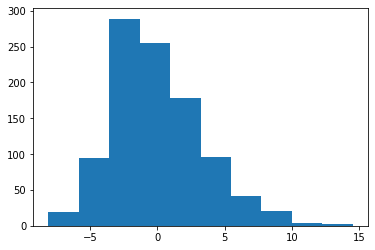

In [96]:
plt.hist(X[0])

In [97]:
X = GPU_data(X)
Y = GPU_data(Y)

In [98]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [99]:
def cross_entropy(outputs, labels):            #this block calculates the loss for the AI guesses
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [100]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [101]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [102]:
def acc(out,y):
    with torch.no_grad(): #this block calculates the accuracy of the labels given to the images
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [103]:
X.shape

torch.Size([50, 1000])

In [104]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [105]:
def model(x,w):

    return x@w[0]

In [106]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test') #this block will make plots of the AI tests

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [107]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  #this block will activate the program that can display the loss and graphs for the tests 

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


acc_train,▂▂▄▃▁▄▂▂▇█▇▇█▇██▇▇▇▇▇███▇██▇▇▇█▇▇▇█▇▇▇▇▇
loss,▇▇▅▆█▅▇▇▂▁▂▂▁▂▁▁▂▂▂▂▂▁▁▁▂▁▁▂▂▂▁▂▂▂▁▂▂▂▂▂
acc_train,0.90625
loss,0.40701


<ipython-input-72-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/

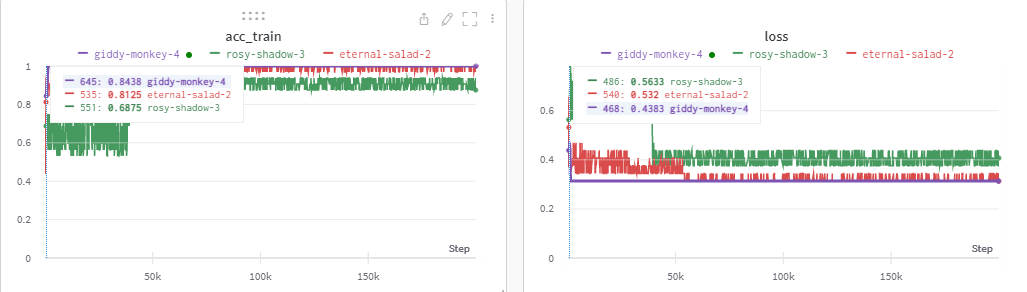

Here you can see that my last test was the best. The loss was very minimal by the third trial. The first run was actually the 2nd best, and the second test had the worst loss.